In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
import fp_utils

In [3]:
fp_utils.settings.init_fp_utils()

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [4]:
data_dir = Path('../data')

In [5]:
df = fp_utils.data_io.DataFrameLoader.pickle(data_dir / '1e5.pickle')
df.shape

(100000, 2575)

# Minimally correlating columns + BF

In [6]:
min_cor_cols = np.load(str(data_dir / 'cols.npy'))

In [7]:
min_cor_cols[:10]

array([ 883,  489,   94, 1585, 1556, 1576,  832,  295,  919, 1345])

In [8]:
from fp_utils.finders import BFDriveFinder, SubColsFinder

In [9]:
bfd_finder = BFDriveFinder(df, data_dir / 'bf_data')

1.308s -- BFDriveFinder init time


In [10]:
class MCC10(SubColsFinder):
    columns = min_cor_cols[:10]
    
class MCC50(SubColsFinder):
    columns = min_cor_cols[:50]
    
class MCC100(SubColsFinder):
    columns = min_cor_cols[:100]
    
class MCC500(SubColsFinder):
    columns = min_cor_cols[:500]
    
class MCC1000(SubColsFinder):
    columns = min_cor_cols[:1000]

In [11]:
mcc10 = MCC10(df, BFDriveFinder, data_dir / 'mcc10')

0.026s -- BFDriveFinder init time
1.400s -- MCC10 init time


In [12]:
mcc50 = MCC50(df, BFDriveFinder, data_dir / 'mcc50')

0.055s -- BFDriveFinder init time
1.352s -- MCC50 init time


In [13]:
mcc100 = MCC100(df, BFDriveFinder, data_dir / 'mcc100')

0.069s -- BFDriveFinder init time
0.974s -- MCC100 init time


In [14]:
mcc500 = MCC500(df, BFDriveFinder, data_dir / 'mcc500')

0.279s -- BFDriveFinder init time
1.346s -- MCC500 init time


In [15]:
mcc1000 = MCC1000(df, BFDriveFinder, data_dir / 'mcc1000')

0.492s -- BFDriveFinder init time
1.972s -- MCC1000 init time


In [16]:
from fp_utils.tests import FinderCorrectnessTester, FinderSpeedTester

In [17]:
checker = FinderCorrectnessTester(bfd_finder, [mcc10, mcc50, mcc100, mcc500, mcc1000])

In [18]:
tests = df.sample(20)

In [19]:
%%time
checker.test_all(tests, verbose=True)

-----
Test #000
OK -- MCC10
OK -- MCC50
OK -- MCC100
OK -- MCC500
OK -- MCC1000
-----
Test #001
OK -- MCC10
OK -- MCC50
OK -- MCC100
OK -- MCC500
OK -- MCC1000
-----
Test #002
OK -- MCC10
OK -- MCC50
OK -- MCC100
OK -- MCC500
OK -- MCC1000
-----
Test #003
OK -- MCC10
OK -- MCC50
OK -- MCC100
OK -- MCC500
OK -- MCC1000
-----
Test #004
OK -- MCC10
OK -- MCC50
OK -- MCC100
OK -- MCC500
OK -- MCC1000
-----
Test #005
OK -- MCC10
OK -- MCC50
OK -- MCC100
OK -- MCC500
OK -- MCC1000
-----
Test #006
OK -- MCC10
OK -- MCC50
OK -- MCC100
OK -- MCC500
OK -- MCC1000
-----
Test #007
OK -- MCC10
OK -- MCC50
OK -- MCC100
OK -- MCC500
OK -- MCC1000
-----
Test #008
OK -- MCC10
OK -- MCC50
OK -- MCC100
OK -- MCC500
OK -- MCC1000
-----
Test #009
OK -- MCC10
OK -- MCC50
OK -- MCC100
OK -- MCC500
OK -- MCC1000
-----
Test #010
OK -- MCC10
OK -- MCC50
OK -- MCC100
OK -- MCC500
OK -- MCC1000
-----
Test #011
OK -- MCC10
OK -- MCC50
OK -- MCC100
OK -- MCC500
OK -- MCC1000
-----
Test #012
OK -- MCC10
OK -- MCC50


array([ True,  True,  True,  True,  True])

In [20]:
speed_tester = FinderSpeedTester([bfd_finder, mcc10, mcc50, mcc100, mcc500, mcc1000])

In [21]:
stat = speed_tester.test_all(tests, verbose=True)

-----
Test #000
1.079s -- BFDriveFinder
0.484s -- MCC10
0.321s -- MCC50
0.345s -- MCC100
0.476s -- MCC500
0.624s -- MCC1000
-----
Test #001
1.018s -- BFDriveFinder
0.477s -- MCC10
0.320s -- MCC50
0.340s -- MCC100
0.476s -- MCC500
0.620s -- MCC1000
-----
Test #002
1.029s -- BFDriveFinder
1.387s -- MCC10
0.365s -- MCC50
0.398s -- MCC100
0.511s -- MCC500
0.655s -- MCC1000
-----
Test #003
1.154s -- BFDriveFinder
5.341s -- MCC10
5.430s -- MCC50
5.259s -- MCC100
0.481s -- MCC500
0.651s -- MCC1000
-----
Test #004
1.098s -- BFDriveFinder
1.323s -- MCC10
0.530s -- MCC50
0.389s -- MCC100
0.496s -- MCC500
0.652s -- MCC1000
-----
Test #005
1.175s -- BFDriveFinder
1.197s -- MCC10
0.364s -- MCC50
0.344s -- MCC100
0.470s -- MCC500
0.622s -- MCC1000
-----
Test #006
1.264s -- BFDriveFinder
0.330s -- MCC10
0.328s -- MCC50
0.366s -- MCC100
0.497s -- MCC500
0.725s -- MCC1000
-----
Test #007
1.129s -- BFDriveFinder
5.275s -- MCC10
0.376s -- MCC50
0.360s -- MCC100
0.485s -- MCC500
0.684s -- MCC1000
-----
Te

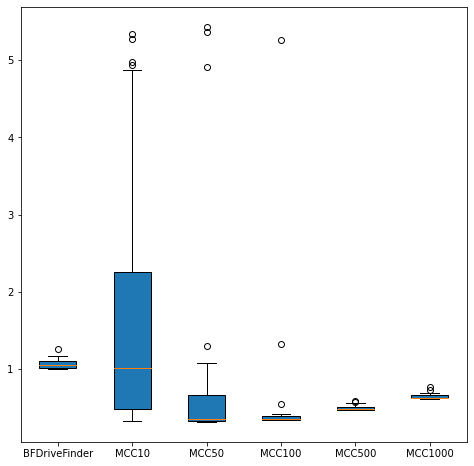

In [22]:
stat.as_boxplot()

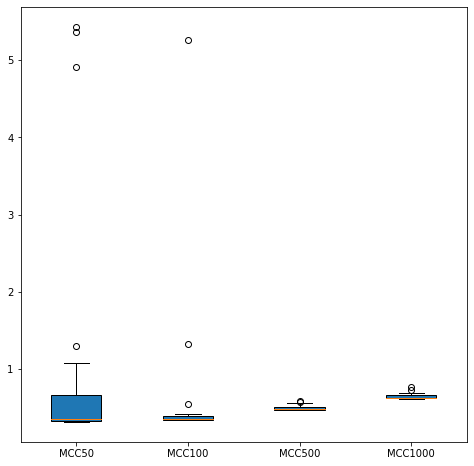

In [23]:
stat.drop([bfd_finder, MCC10]).as_boxplot()

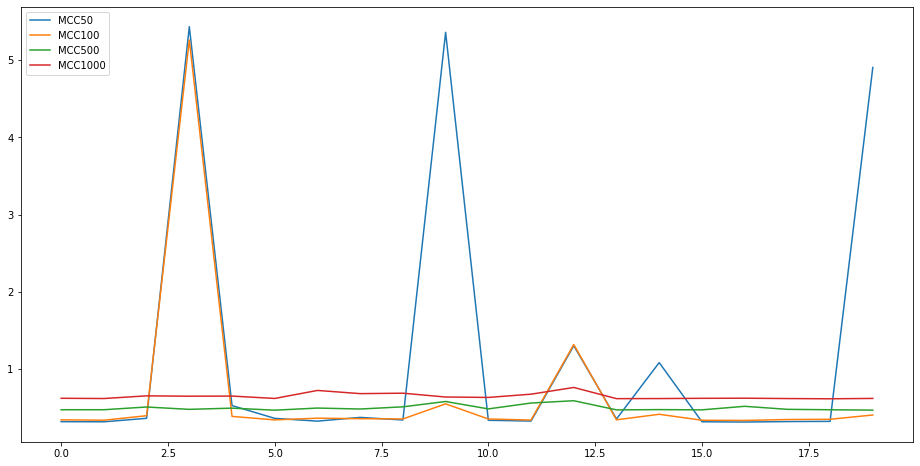

In [24]:
stat.drop([bfd_finder, MCC10]).as_plot()

In [25]:
class MCC20(SubColsFinder):
    columns = min_cor_cols[:20]
    
class MCC30(SubColsFinder):
    columns = min_cor_cols[:30]
    
class MCC40(SubColsFinder):
    columns = min_cor_cols[:40]

In [26]:
mcc20 = MCC20(df,BFDriveFinder, data_dir / 'mcc20')

0.030s -- BFDriveFinder init time
1.562s -- MCC20 init time


In [27]:
mcc30 = MCC30(df, BFDriveFinder, data_dir / 'mcc30')

0.034s -- BFDriveFinder init time
1.424s -- MCC30 init time


In [28]:
mcc40 = MCC40(df, BFDriveFinder, data_dir / 'mcc40')

0.046s -- BFDriveFinder init time
1.446s -- MCC40 init time


In [29]:
speed_tester = FinderSpeedTester([mcc20, mcc30, mcc40])

In [30]:
stat2 = speed_tester.test_all(tests, verbose=True)

-----
Test #000
0.360s -- MCC20
0.310s -- MCC30
0.303s -- MCC40
-----
Test #001
0.302s -- MCC20
0.302s -- MCC30
0.302s -- MCC40
-----
Test #002
0.483s -- MCC20
0.480s -- MCC30
0.354s -- MCC40
-----
Test #003
5.100s -- MCC20
5.411s -- MCC30
5.350s -- MCC40
-----
Test #004
0.591s -- MCC20
0.602s -- MCC30
0.622s -- MCC40
-----
Test #005
1.174s -- MCC20
1.204s -- MCC30
1.250s -- MCC40
-----
Test #006
0.362s -- MCC20
0.362s -- MCC30
0.381s -- MCC40
-----
Test #007
0.606s -- MCC20
0.392s -- MCC30
0.365s -- MCC40
-----
Test #008
0.371s -- MCC20
0.333s -- MCC30
0.326s -- MCC40
-----
Test #009
5.422s -- MCC20
5.036s -- MCC30
4.966s -- MCC40
-----
Test #010
0.465s -- MCC20
0.467s -- MCC30
0.359s -- MCC40
-----
Test #011
0.312s -- MCC20
0.315s -- MCC30
0.313s -- MCC40
-----
Test #012
5.068s -- MCC20
4.973s -- MCC30
1.314s -- MCC40
-----
Test #013
1.089s -- MCC20
0.528s -- MCC30
0.412s -- MCC40
-----
Test #014
1.084s -- MCC20
1.072s -- MCC30
1.076s -- MCC40
-----
Test #015
0.323s -- MCC20
0.322s -

In [31]:
stat3 = stat.take([mcc10]) + stat2 + stat.take([mcc50])

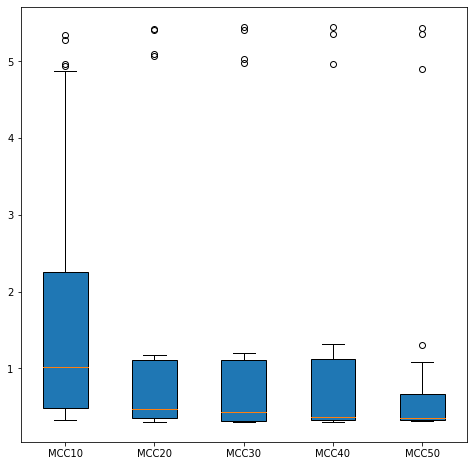

In [32]:
stat3.as_boxplot()

In [33]:
stat3

MCC10:
	0.330 -- min
	5.341 -- max
	1.821 -- mean
	1.020 -- median
MCC20:
	0.302 -- min
	5.422 -- max
	1.477 -- mean
	0.474 -- median
MCC30:
	0.302 -- min
	5.450 -- max
	1.426 -- mean
	0.429 -- median
MCC40:
	0.302 -- min
	5.451 -- max
	1.223 -- mean
	0.362 -- median
MCC50:
	0.317 -- min
	5.430 -- max
	1.167 -- mean
	0.350 -- median

# Minimally correlating columns + SplitTree

In [34]:
from fp_utils.finders import SplitterTreeFinder

In [35]:
tree = SplitterTreeFinder(df, data_dir / 'splitter_tree')

29.119s -- SplitterTreeFinder init time


In [36]:
class Tree(SplitterTreeFinder):
    BUCKET_SIZE = 10000
    MAX_DEPTH = 5

In [37]:
mcc10 = MCC10(df, Tree, data_dir / 'mcc10')

IndexError: index 0 is out of bounds for axis 0 with size 0

# Ivan's columns + SplitTree

In [38]:
iv_cols = df.mean().apply(lambda p: p * (1 - p) / (1 - p + p * p)).sort_values(ascending=False)

In [39]:
iv_cols

1510    0.333333
3197    0.333333
3403    0.333333
3026    0.333333
1212    0.333333
          ...   
3016    0.001940
3166    0.001940
3385    0.001940
2871    0.000000
3654    0.000000
Length: 2575, dtype: float64

In [40]:
class Tree(SplitterTreeFinder):
    BUCKET_SIZE = 5000
    MAX_DEPTH = 8

In [43]:
class IC10(SubColsFinder):
    columns = iv_cols.index[:10]
    
class IC50(SubColsFinder):
    columns = iv_cols.index[:50]
    
class IC100(SubColsFinder):
    columns = iv_cols.index[:100]
    
class IC500(SubColsFinder):
    columns = iv_cols.index[:500]
    
class IC1000(SubColsFinder):
    columns = iv_cols.index[:1000]

In [44]:
ic100 = IC100(df, Tree, data_dir / 'ic100')

1.337s -- SplitterTreeFinder init time
1.947s -- IC100 init time


In [45]:
ic500 = IC500(df, Tree, data_dir / 'ic500')

4.428s -- SplitterTreeFinder init time
5.345s -- IC500 init time


In [46]:
ic1000 = IC1000(df, Tree, data_dir / 'ic1000')

9.853s -- SplitterTreeFinder init time
11.706s -- IC1000 init time


In [47]:
checker = FinderCorrectnessTester(bfd_finder, [ic100, ic500, ic1000])

In [48]:
checker.test_random(df, 5, verbose=True)

-----
Test #000
OK -- IC100
OK -- IC500
OK -- IC1000
-----
Test #001
OK -- IC100
OK -- IC500
OK -- IC1000
-----
Test #002
OK -- IC100
OK -- IC500
OK -- IC1000
-----
Test #003
OK -- IC100
OK -- IC500
OK -- IC1000
-----
Test #004
OK -- IC100
OK -- IC500
OK -- IC1000
-----


array([ True,  True,  True])

In [49]:
speed_tester = FinderSpeedTester([ic100, ic500, ic1000])

In [50]:
tests = df.sample(50)

In [51]:
stat4 = speed_tester.test_all(tests, verbose=True)

-----
Test #000
0.021s -- IC100
0.064s -- IC500
0.072s -- IC1000
-----
Test #001
0.014s -- IC100
0.034s -- IC500
0.132s -- IC1000
-----
Test #002
0.063s -- IC100
0.189s -- IC500
0.282s -- IC1000
-----
Test #003
0.047s -- IC100
0.128s -- IC500
0.207s -- IC1000
-----
Test #004
0.019s -- IC100
0.069s -- IC500
0.105s -- IC1000
-----
Test #005
0.023s -- IC100
0.016s -- IC500
0.059s -- IC1000
-----
Test #006
0.037s -- IC100
0.041s -- IC500
0.035s -- IC1000
-----
Test #007
0.024s -- IC100
0.099s -- IC500
0.117s -- IC1000
-----
Test #008
0.148s -- IC100
0.259s -- IC500
0.278s -- IC1000
-----
Test #009
0.064s -- IC100
0.183s -- IC500
0.189s -- IC1000
-----
Test #010
0.859s -- IC100
0.326s -- IC500
0.460s -- IC1000
-----
Test #011
0.032s -- IC100
0.075s -- IC500
0.140s -- IC1000
-----
Test #012
0.020s -- IC100
0.048s -- IC500
0.069s -- IC1000
-----
Test #013
0.018s -- IC100
0.054s -- IC500
0.107s -- IC1000
-----
Test #014
0.029s -- IC100
0.063s -- IC500
0.164s -- IC1000
-----
Test #015
0.010s --

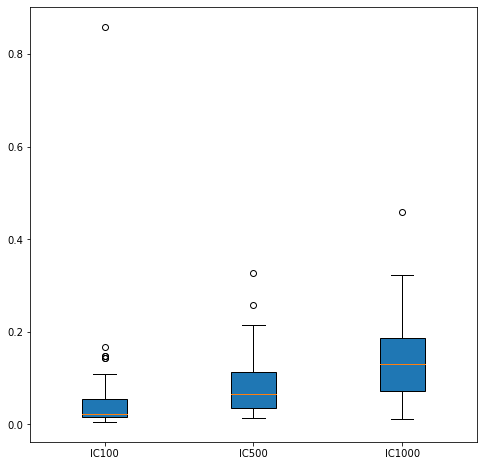

In [52]:
stat4.as_boxplot()

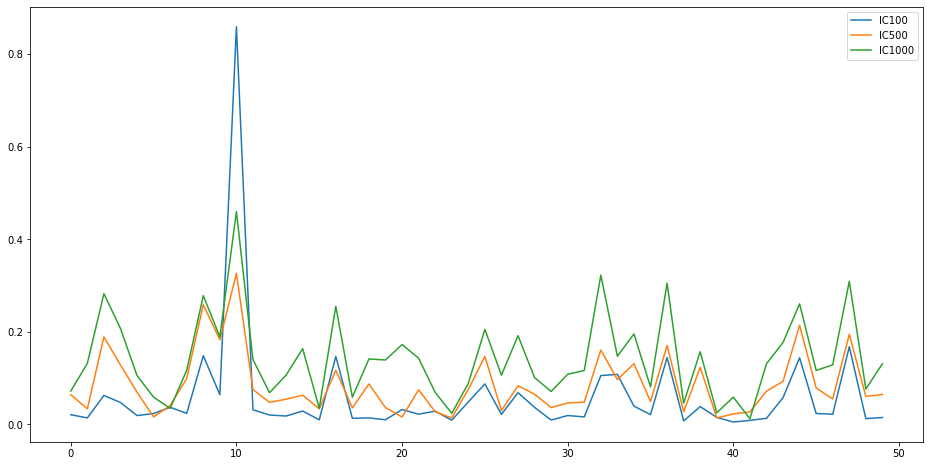

In [53]:
stat4.as_plot()

In [57]:
fp = tests.iloc[10]

In [58]:
fp

3623    0
2858    0
3541    0
3593    0
3514    0
       ..
3016    1
3166    1
3385    1
2871    1
3654    1
Name: C1([H])(C([H])([H])C([H])=C([H])[H])C([H])([H])C1([H])C([H])([H])[H], Length: 2575, dtype: int64

In [61]:
answers = list(ic500.find(fp))

In [63]:
answers.__len__()

168

In [64]:
from fp_utils.draw import MoleculeDrawer

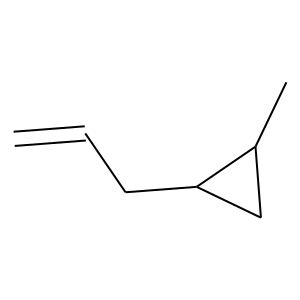

In [65]:
MoleculeDrawer.draw_one(fp.name)

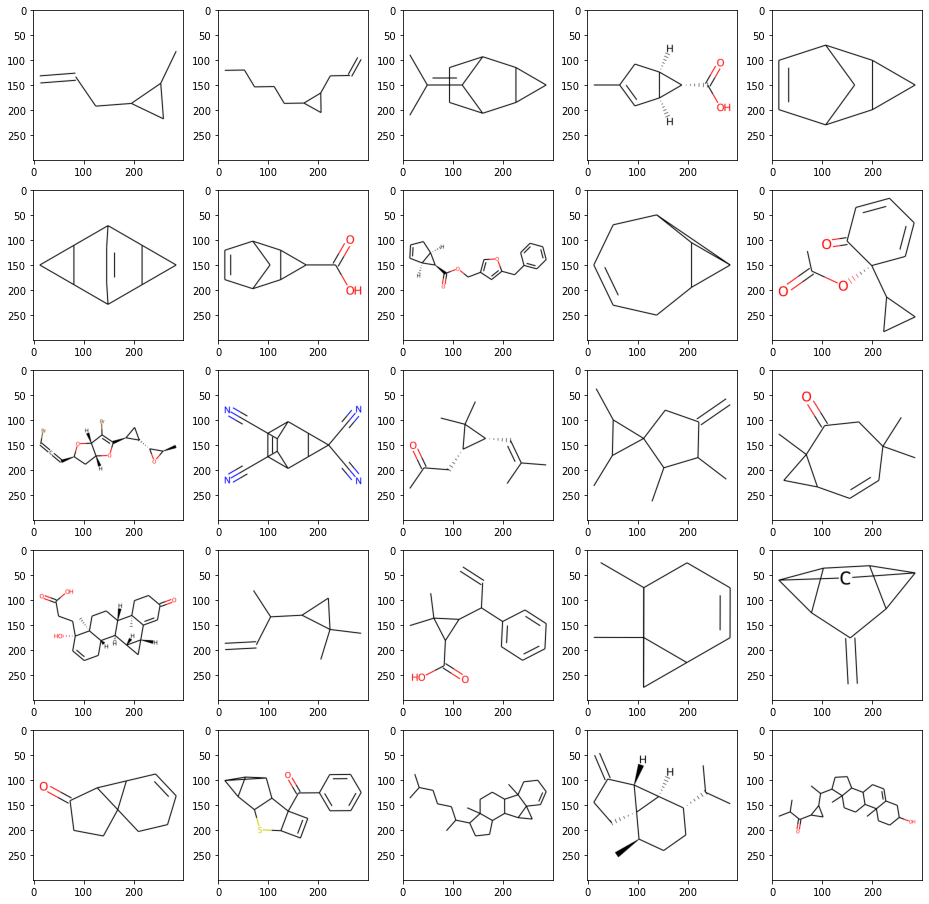

In [68]:
MoleculeDrawer.draw_many(answers, shape=(5, 5))

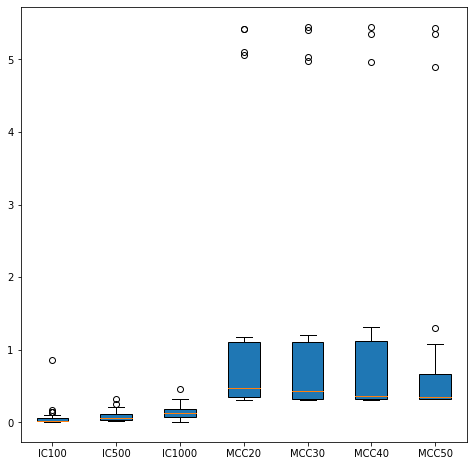

In [56]:
(stat4 + stat3.drop([MCC10])).as_boxplot()